## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Loading libraries

In [17]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [166]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [146]:
print("No of train images:",len(x_train))

No of train images: 60000


In [147]:
print("No of test images:",len(x_test))

No of test images: 10000


### Find dimensions of an image in the dataset

In [148]:
x_train[0].shape

(28, 28)

In [149]:
x_test[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

First find the total number of classes on Train and Test labels data

In [175]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train Labels',unique)

Train Labels [0 1 2 3 4 5 6 7 8 9]


In [176]:
y_train = keras.utils.to_categorical(y_train,10)

In [177]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [178]:
unique,counts=np.unique(y_test,return_counts=True)
print('Test Labels',unique)

Test Labels [0 1 2 3 4 5 6 7 8 9]


In [179]:
y_test = np_utils.to_categorical(y_test,10)

In [180]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

Done as folllowing

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [162]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

In [163]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Import the necessary layers from keras to build the model

Already imported on the top

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [32]:
BATCH_SIZE = 32
EPOCHS = 10

In [33]:

    # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.3695 - accuracy: 0.8685 - val_loss: 0.2951 - val_accuracy: 0.8942
Epoch 2/10
   64/60000 [..............................] - ETA: 2:18 - loss: 0.1884 - accuracy: 0.9219

C:\Users\jaishu\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 143s 2ms/step - loss: 0.2307 - accuracy: 0.9138 - val_loss: 0.2454 - val_accuracy: 0.9091
Epoch 3/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1693 - accuracy: 0.9371 - val_loss: 0.2474 - val_accuracy: 0.9144
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1197 - accuracy: 0.9553 - val_loss: 0.2624 - val_accuracy: 0.9126
Epoch 5/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0804 - accuracy: 0.9703 - val_loss: 0.2954 - val_accuracy: 0.9165
Epoch 6/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.3178 - val_accuracy: 0.9171
Epoch 7/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0376 - accuracy: 0.9865 - val_loss: 0.3853 - val_accuracy: 0.9149
Epoch 8/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0297 - accuracy: 0.9895 - val_loss: 0.463

In [34]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 6s 583us/step
[0.5280953640259802, 0.9057000279426575]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [35]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    


C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.3936 - accuracy: 0.8584 - val_loss: 0.2917 - val_accuracy: 0.8937
Epoch 2/10
   96/60000 [..............................] - ETA: 1:29 - loss: 0.3320 - accuracy: 0.8958

C:\Users\jaishu\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 98s 2ms/step - loss: 0.2582 - accuracy: 0.9057 - val_loss: 0.2729 - val_accuracy: 0.8962
Epoch 3/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.2090 - accuracy: 0.9217 - val_loss: 0.2402 - val_accuracy: 0.9126
Epoch 4/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1756 - accuracy: 0.9346 - val_loss: 0.2296 - val_accuracy: 0.9153
Epoch 5/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1476 - accuracy: 0.9448 - val_loss: 0.2318 - val_accuracy: 0.9192
Epoch 6/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1245 - accuracy: 0.9531 - val_loss: 0.2257 - val_accuracy: 0.9235
Epoch 7/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1045 - accuracy: 0.9604 - val_loss: 0.2539 - val_accuracy: 0.9194
Epoch 8/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0904 - accuracy: 0.9658 - val_loss: 0.2699 - val

In [36]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 5s 547us/step
[0.28066234790235756, 0.925000011920929]


In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

In [37]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

With very few parameters,Model 3 has better accuracy than model 2. The increase in accuracy is 2.5%.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [39]:
from keras.preprocessing.image import ImageDataGenerator

In [55]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    fill_mode='nearest')  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

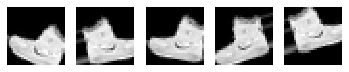

In [56]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [57]:

    # Define Model
    model4 = Sequential()

    # 1st Conv Layer
    model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model4.add(Activation('relu'))

    # 2nd Conv Layer
    model4.add(Convolution2D(32, 3, 3))
    model4.add(Activation('relu'))

    # Max Pooling
    model4.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model4.add(Dropout(0.15))

    # Fully Connected Layer
    model4.add(Flatten())
    model4.add(Dense(128))
    model4.add(Activation('relu'))
    
    # Prediction Layer
    model4.add(Dense(10))
    model4.add(Activation('softmax'))

    # Loss and Optimizer
    model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':


In [58]:
model4.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\Users\jaishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1875/1875 [==============================] - 102s 54ms/step - loss: 1.0028 - accuracy: 0.6332 - val_loss: 0.7476 - val_accuracy: 0.7261
Epoch 2/10
   3/1875 [..............................] - ETA: 1:21 - loss: 0.8721 - accuracy: 0.67

C:\Users\jaishu\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1875/1875 [==============================] - 101s 54ms/step - loss: 0.7392 - accuracy: 0.7256 - val_loss: 0.6357 - val_accuracy: 0.7647
Epoch 3/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.6670 - accuracy: 0.7517 - val_loss: 0.5841 - val_accuracy: 0.7858
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.6216 - accuracy: 0.7696 - val_loss: 0.5746 - val_accuracy: 0.7905
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5890 - accuracy: 0.7830 - val_loss: 0.5250 - val_accuracy: 0.8107
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5663 - accuracy: 0.7898 - val_loss: 0.5027 - val_accuracy: 0.8071
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5501 - accuracy: 0.7970 - val_loss: 0.5110 - val_accuracy: 0.8186
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5277 - accuracy: 0.8057 - val_loss: 0.5088 - val_accu

###  Report the final train and validation accuracy

In [59]:
loss_and_metrics_train = model4.evaluate(x_train, y_train)
print(loss_and_metrics_train)

60000/60000 [==============================] - 16s 273us/step
[0.4687482888539632, 0.8240500092506409]


In [60]:
loss_and_metrics_test = model4.evaluate(x_test, y_test)
print(loss_and_metrics_test)

10000/10000 [==============================] - 3s 271us/step
[0.49727011682987216, 0.8149999976158142]


The model using the augmented data has resulted in  drop in accuracy of the original model by almost 10%

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [61]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [62]:
from keras.datasets import cifar10

In [122]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [123]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


In [124]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

[]

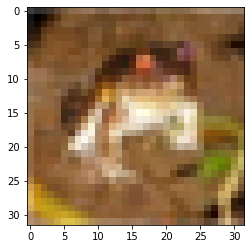

In [125]:
#original Image
plt.imshow(X_train[0:1].squeeze(), cmap='gray')
plt.plot()

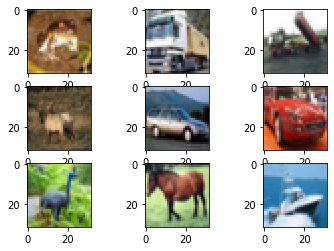

In [126]:
# plot first few images
for i in range(9):
 # define subplot
  plt.subplot(330 + 1 + i)
 # plot raw pixel data
  plt.imshow(X_train[i])
# show the figure
plt.show()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [133]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.2,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

### **Prepare/fit the generator.**

In [134]:
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

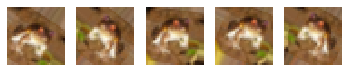

In [135]:
#Augmentented image
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()